<a href="https://colab.research.google.com/github/JPWinterFrankJr/Analise_Dados_analisegames/blob/main/AnaliseGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
Base_Dados= pd.read_csv('PS4_GamesSales.csv', encoding='latin-1') ## encoding='latin-1 passei este comando pois apenas com o read n estava lendo
Base_Dados.head()
##Valores em milhões ex: 6.06 = 6 milhoes

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
#dimensão
Base_Dados.shape

(1034, 9)

In [ ]:
Base_Dados.isnull().sum()
#campos nulos em year e publisher

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [ ]:
##Retirar os valores nulos
#nesse caso vale a pena retirar pois se trata de valores unicos.
Base_Dados.dropna(inplace = True) #inplace = True para aplicar diretamente nos dados e não precisar criar outra variavel

In [ ]:
Base_Dados.describe()
#menos ano 2013
#maior 2020 
#analisamos q tiveram jogos q nao venderam nada
#Europa foi oq teve o max vendido mais alto 


,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Text(0, 0.5, 'Quatidade de vendas(Milhões)')

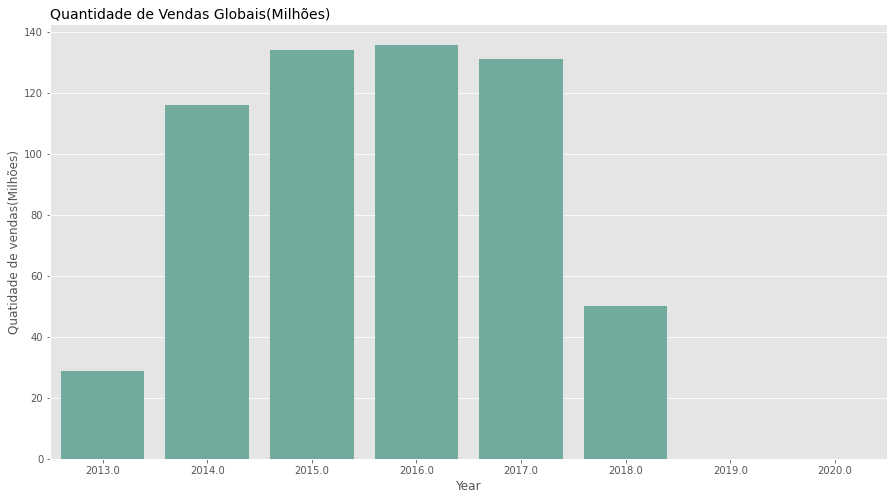

In [ ]:
#tamanho grafico
plt.figure(figsize=(15,8))

#titulo
sns.barplot(data =Base_Dados, x='Year', y='Global',ci=None, color = '#69b3a2', estimator=sum) #ci = None para retirar traço preto das barras e color = '#69b3a2' para mudar a cor das barras e ficar na mesma cor
#estimator=sum valor somado de todos os anos

#Grafico
plt.title('Quantidade de Vendas Globais(Milhões)', loc='left', fontsize= 14)

#label
plt.ylabel('Quatidade de vendas(Milhões)')
#2013 com poucas vendas, 2014 até 2016 um grande aumento e de 2017 a 2018 uma queda

In [ ]:
# Retirar os anos
Base_Dados = Base_Dados.loc[ ( Base_Dados['Year'] != 2019 ) & ( Base_Dados['Year'] != 2020 ) ]

# Verificar
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


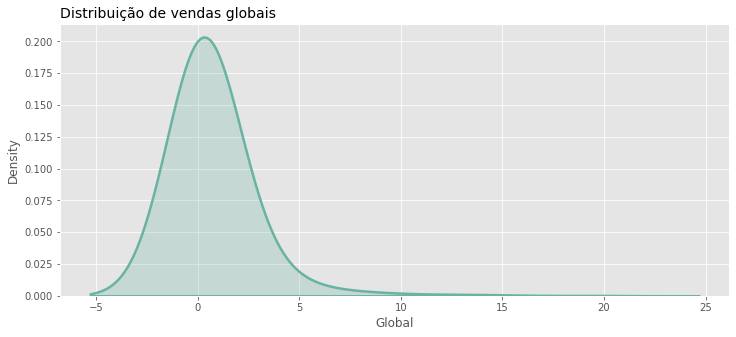

In [ ]:
#Grafico
#Tamanho
plt.figure(figsize=(12,5))

#Estilo
plt.style.use('ggplot')
#titulo
plt.title('Distribuição de vendas globais', loc='left', fontsize=14)
sns.kdeplot(Base_Dados['Global'], shade =True,bw=1, color='#69b3a2', linewidth=2.5); #shade =True para fazer sombra, bw=1 = ajustar a sombra, linewidth = largura da linha
##

In [ ]:
Base_Dados.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


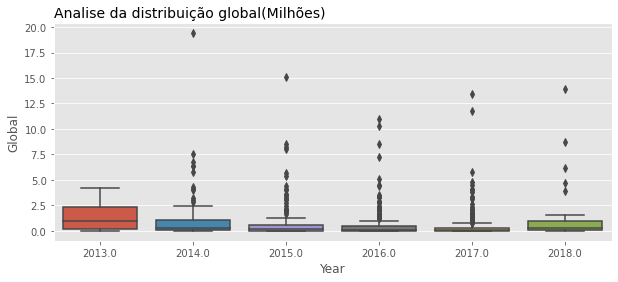

In [ ]:
plt.figure( figsize=(10,4))
plt.title("Analise da distribuição global(Milhões)", loc='left', fontsize=14)
sns.boxplot(data=Base_Dados, x='Year', y='Global')
#pontinhos no grafico, são dados muito longe da minha distrubuição, ponto fora da curva

In [ ]:
#Jogos mais vendidos até 2018 do ps4
Base_Dados.loc[Base_Dados['Global']>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
Analise = Base_Dados.groupby( by=['Year'] ).sum().reset_index()
Analise




,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [ ]:
# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo


([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

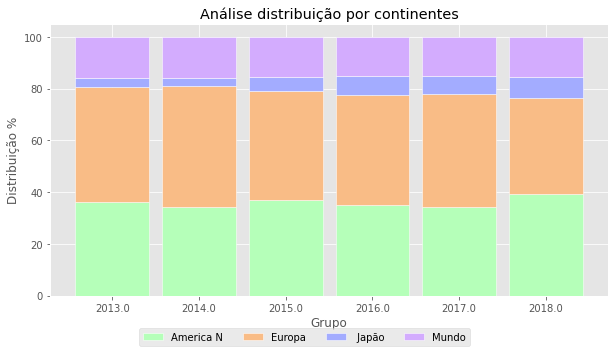

In [ ]:
# Tamanho 
plt.figure( figsize=(10, 5) )

# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 ); #ncol=4 PARA DEIXAR NA MESMA LINHA

In [ ]:
#empresas que publicaram games 
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
#tranformar os dados acima em numeros ex: rockstar = 1
from sklearn.preprocessing import LabelEncoder #Biblioteca p tranformar os dados acima em numeros ex: rockstar = 1
Funcao_Label = LabelEncoder() #Variavel que recebe função que acabamos de importar
Base_Dados['Produtor'] = Funcao_Label.fit_transform(Base_Dados['Publisher'])#Criação de coluna c valor numerico
Base_Dados['Genero'] = Funcao_Label.fit_transform(Base_Dados['Genre']) #Criação de coluna c valor numerico
Base_Dados['Jogo'] = Funcao_Label.fit_transform(Base_Dados['Game'])#Criação de coluna c valor numerico

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [ ]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

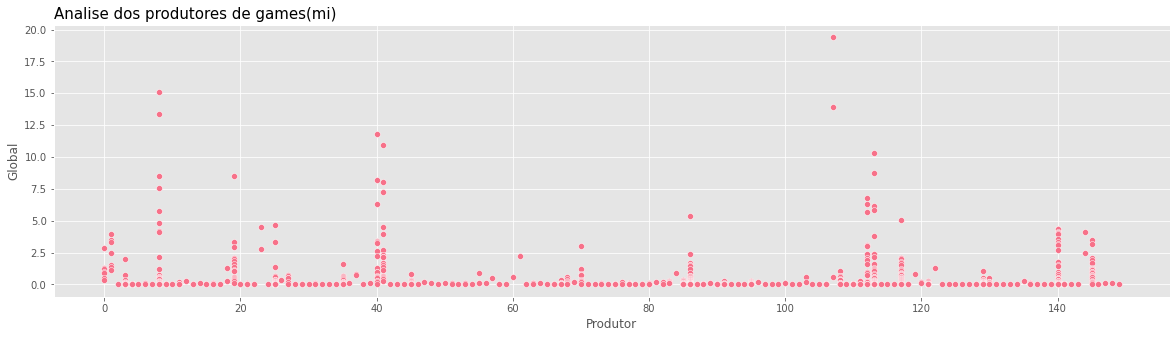

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Analise dos produtores de games(mi)",loc='Left', fontsize= 15)
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0]) ;

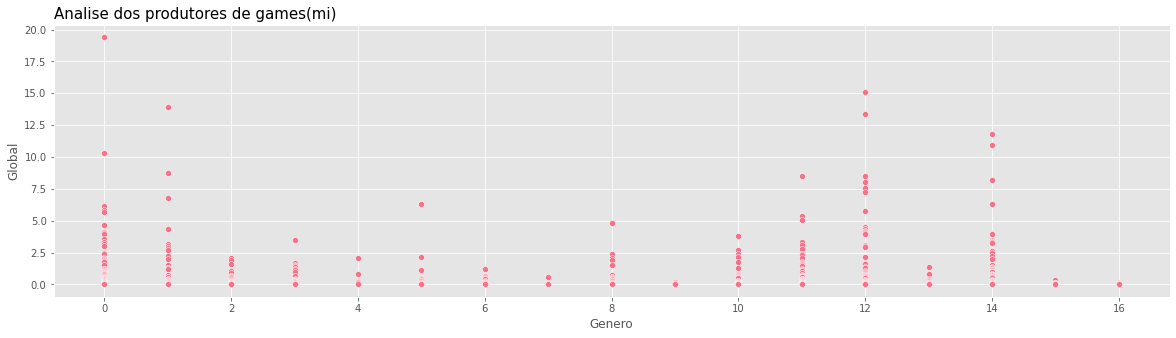

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Analise por genero de games(mi)",loc='Left', fontsize= 15)
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0]) ;
#generos mais vendidos 0, 12 e 14 (0=ação, 12=tiro)

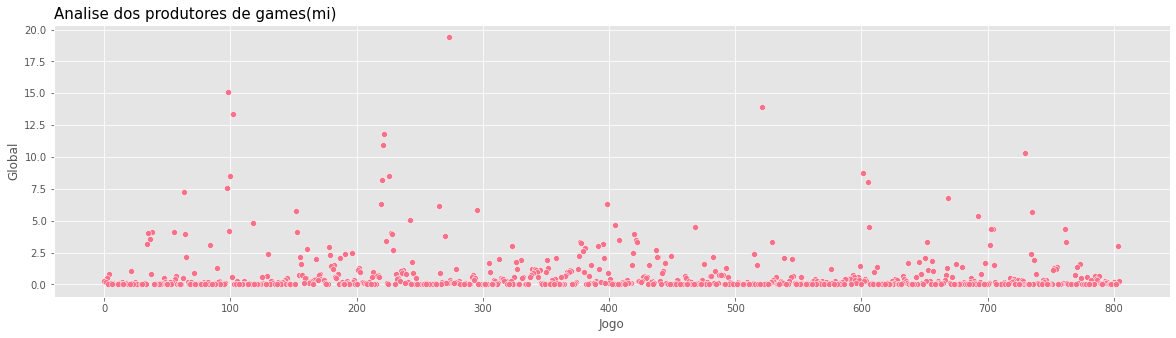

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Analise de games(mi)",loc='Left', fontsize= 15)
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0]) ;

In [ ]:
#se eu quiser lançar um jogo quais insights você tiraria ?
